In [ ]:
from nilearn import plotting, image
import nibabel as nib
import os
import numpy as np
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%run loading_data.ipynb
sub_data = load_txt()
atlas = load_atlas()
unrestricted_data = load_unrestricted()
restricted_data = load_restricted()
atlas = load_atlas()

In [176]:
atlas = image.load_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz")
atlas = image.threshold_img(atlas, "99.5%") 
print("atlas has shape", ["x", "y", "z", "region"], "=", atlas.shape)

# fig, axs = plt.subplots(nrows=1, figsize=(10, 5))

# plotting.plot_prob_atlas(atlas, colorbar=True, draw_cross=False, axes=axs)
# axs.set_title("Map of Brain Regions")

atlas has shape ['x', 'y', 'z', 'region'] = (91, 109, 91, 100)


In [177]:
#plotting connections on the brain
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
atlas_coords = np.array(atlas_coords)

array([[ 2.55685685e+01, -9.80229207e+01, -4.46741346e+00],
       [ 5.17260306e+01, -5.91101410e+01,  3.85876272e+01],
       [ 3.87059559e+01, -8.64430992e+01, -1.91554817e+00],
       [-3.48367382e-01, -8.45401917e+01,  3.34819255e+01],
       [-6.06027016e+01, -3.52438436e+01,  3.72115667e+01],
       [ 4.30487274e+01, -7.49261045e+01,  3.52094381e+01],
       [ 5.33714269e+01, -4.07512098e+01,  4.97414960e+01],
       [ 3.27532115e+01, -8.09502942e+01,  2.67604815e+01],
       [-4.35304596e+01, -6.92825659e+01,  4.04177991e+01],
       [ 1.13679784e+00, -6.29915592e+01,  3.91027784e+01],
       [ 1.96116625e+01, -7.43659793e+01, -9.20005267e+00],
       [-5.43258245e+01, -5.43773932e+01,  3.70103980e+01],
       [-2.03219641e+01, -8.68082231e+01,  2.80017992e+01],
       [-3.22687501e+01, -6.37899630e+01,  4.56341688e+01],
       [ 1.08077873e+00, -7.23773681e+01,  3.78637465e+01],
       [ 1.47780136e+01, -9.10829603e+01,  2.29369790e+01],
       [ 1.48389847e+01, -6.61667356e+01

In [178]:
def find_closest_point(atlas_coords, reference_point):
    indices = [i for i, coord in enumerate(atlas_coords) if np.all(np.isclose(coord, [-38, -24, 62], rtol=1))]
    if len(indices) == 0:
        return None
    dist = np.inf
    closest_idx = None
    for idx in indices:
        i = atlas_coords[idx]
        curr_dist = euclidean(reference_point, i)
        if curr_dist < dist:
            dist = curr_dist
            closest_point = i
            closest_idx = idx
    print(closest_point, dist)
    return closest_idx

In [179]:
rois = {
    "Left M1": [-38, -24, 62],
    "Right M1": [34, -22, 62],
    "Left SMA" : [-8, 0, 54],
    "Right SMA" : [8, 0, 54],
    "Left PMd": [-16, -20, 48],
    "Right PMd": [34, -8, 52]}

In [182]:
all_points = set()
for k, v in rois.items():
    print(f"Closest point to {k}:")
    closest = find_closest_point(atlas_coords, v)
    all_points.add(closest)

Closest point to Left M1:
[-43.08567396 -24.81113141  58.05957273] 6.484518552605094
Closest point to Right M1:
[-13.00632224 -14.99717362  10.58974989] 70.01176846982817
Closest point to Left SMA:
[-43.08567396 -24.81113141  58.05957273] 43.16337440486786
Closest point to Right SMA:
[-13.00632224 -14.99717362  10.58974989] 50.50376822872696
Closest point to Left PMd:
[-43.08567396 -24.81113141  58.05957273] 29.29122262787204
Closest point to Right PMd:
[-13.00632224 -14.99717362  10.58974989] 63.03462210079913


In [183]:
all_points

{40, 66}

In [187]:
corr_matrix = np.corrcoef(sub_data[0].T)

In [ ]:
corr_matrix[42]

array([-8.23566945e-02, -2.45518601e-02,  1.40773220e-01, -5.27534907e-02,
        3.45498418e-01, -3.97385055e-02, -2.07244081e-01, -4.04733481e-01,
        6.52448610e-01, -3.90863225e-01,  1.86285956e-01, -2.76270141e-01,
        1.95356392e-01, -2.47257727e-01, -6.82076161e-02,  7.42537323e-02,
        2.50835305e-01,  1.37186153e-01, -1.89113667e-01, -2.57277408e-01,
        1.06059662e-01, -2.33533802e-01, -4.79356015e-02, -1.88320458e-01,
        1.07110584e-01, -1.11382073e-01, -1.37218569e-01,  1.63689573e-01,
        1.68040922e-02,  3.03003560e-01, -1.94423802e-01,  1.95930481e-01,
       -4.65554641e-01,  3.49051107e-02, -1.90323610e-01, -2.06843777e-02,
       -2.29165320e-01,  3.05095836e-02, -2.71384068e-01, -2.90214239e-01,
        1.24945510e-01,  5.36083177e-02,  1.00000000e+00,  2.18087573e-01,
        1.38058325e-01,  5.24036211e-01,  4.22049905e-03,  1.29846790e-01,
       -1.35716015e-01,  4.60154821e-01,  1.75631295e-01, -3.17586647e-01,
       -1.11889231e-01,  

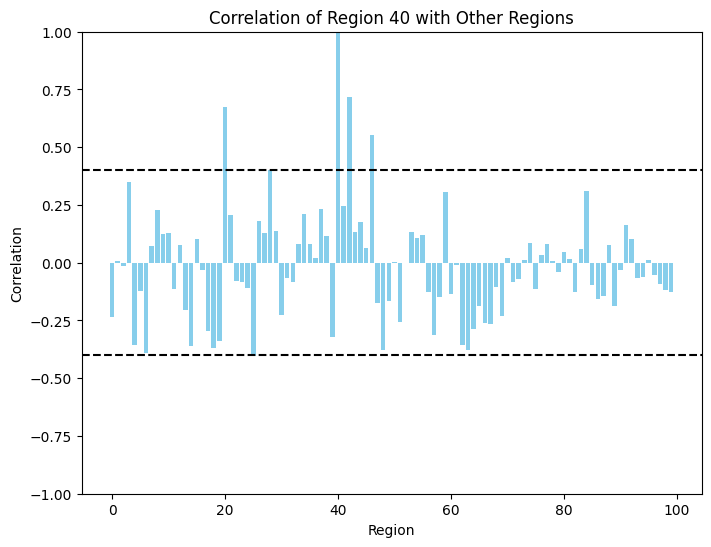

In [189]:
correlation_row = corr_matrix[40]
plt.figure(figsize=(8, 6))
plt.bar(range(len(correlation_row)), correlation_row, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.title(f'Correlation of Region {40} with Other Regions')
#plt.xticks(range(len(correlation_row)), labels=[f'Region {i}' for i in range(len(correlation_row))])
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
#plt.grid(True)
plt.axhline(0.4, 0, 300, color='black', linestyle='--')
plt.axhline(-0.4, 0, 300, color='black', linestyle='--')
plt.show()

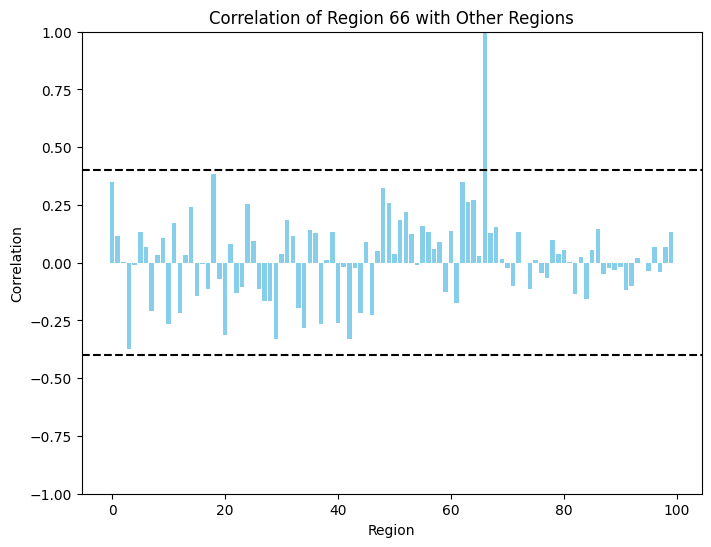

In [190]:
correlation_row = corr_matrix[66]
plt.figure(figsize=(8, 6))
plt.bar(range(len(correlation_row)), correlation_row, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.title(f'Correlation of Region {66} with Other Regions')
#plt.xticks(range(len(correlation_row)), labels=[f'Region {i}' for i in range(len(correlation_row))])
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
#plt.grid(True)
plt.axhline(0.4, 0, 300, color='black', linestyle='--')
plt.axhline(-0.4, 0, 300, color='black', linestyle='--')
plt.show()

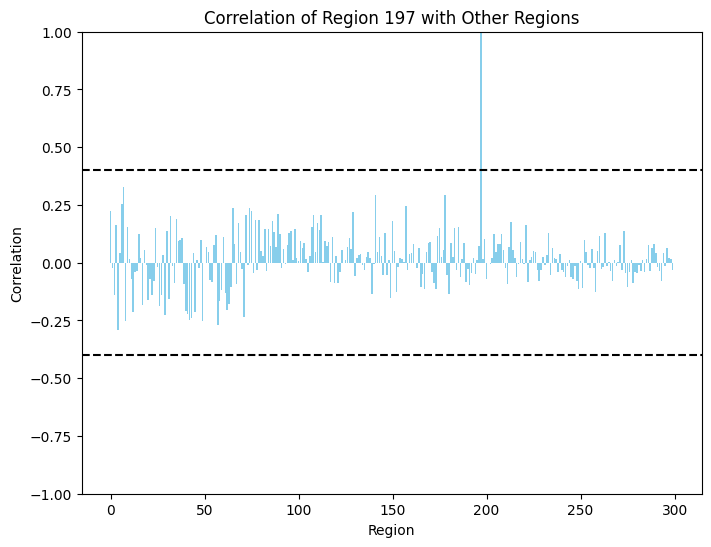

In [140]:
correlation_row = corr_matrix[197]
plt.figure(figsize=(8, 6))
plt.bar(range(len(correlation_row)), correlation_row, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.title(f'Correlation of Region {197} with Other Regions')
#plt.xticks(range(len(correlation_row)), labels=[f'Region {i}' for i in range(len(correlation_row))])
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
#plt.grid(True)
plt.axhline(0.4, 0, 300, color='black', linestyle='--')
plt.axhline(-0.4, 0, 300, color='black', linestyle='--')
plt.show()

In [153]:
corr_matrix_left = np.corrcoef(sub_data[9].T)

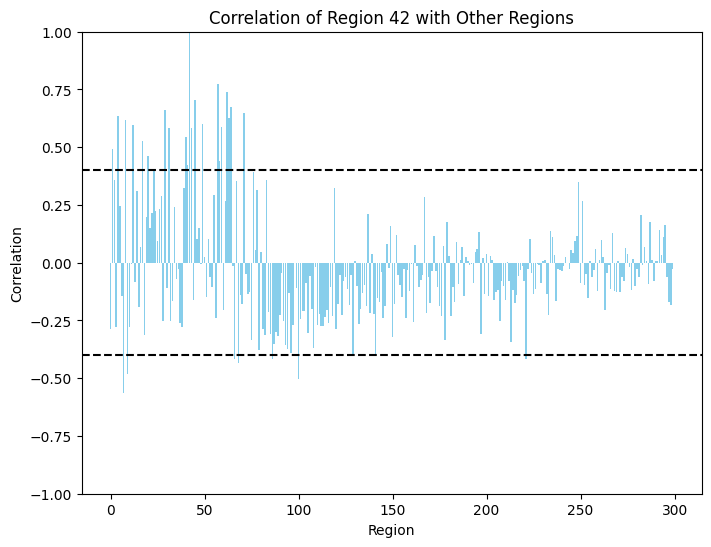

In [154]:
correlation_row = corr_matrix_left[42]
plt.figure(figsize=(8, 6))
plt.bar(range(len(correlation_row)), correlation_row, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.title(f'Correlation of Region {42} with Other Regions')
#plt.xticks(range(len(correlation_row)), labels=[f'Region {i}' for i in range(len(correlation_row))])
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
#plt.grid(True)
plt.axhline(0.4, 0, 300, color='black', linestyle='--')
plt.axhline(-0.4, 0, 300, color='black', linestyle='--')
plt.show()

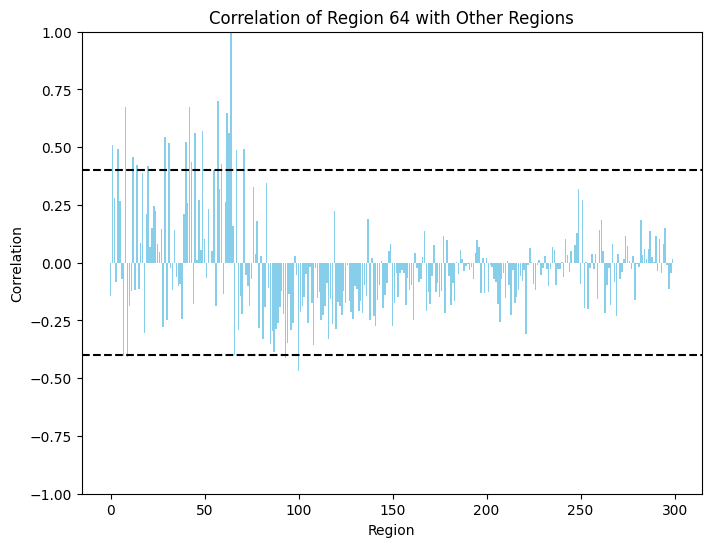

In [157]:
correlation_row = corr_matrix_left[64]
plt.figure(figsize=(8, 6))
plt.bar(range(len(correlation_row)), correlation_row, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.title(f'Correlation of Region {64} with Other Regions')
#plt.xticks(range(len(correlation_row)), labels=[f'Region {i}' for i in range(len(correlation_row))])
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
#plt.grid(True)
plt.axhline(0.4, 0, 300, color='black', linestyle='--')
plt.axhline(-0.4, 0, 300, color='black', linestyle='--')
plt.show()

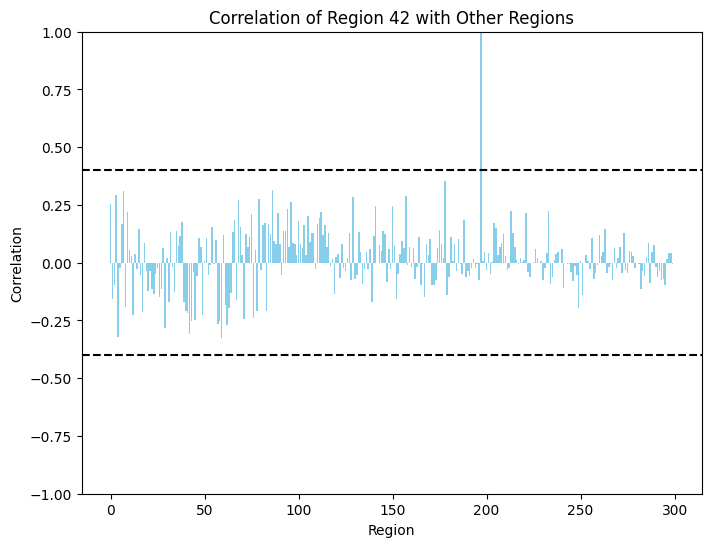

In [156]:
correlation_row = corr_matrix_left[197]
plt.figure(figsize=(8, 6))
plt.bar(range(len(correlation_row)), correlation_row, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.title(f'Correlation of Region {197} with Other Regions')
#plt.xticks(range(len(correlation_row)), labels=[f'Region {i}' for i in range(len(correlation_row))])
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
#plt.grid(True)
plt.axhline(0.4, 0, 300, color='black', linestyle='--')
plt.axhline(-0.4, 0, 300, color='black', linestyle='--')
plt.show()

In [212]:
def total_corr(sub_data, roi):
    corr_matrix = np.corrcoef(sub_data.T)
    avg_corr = np.sum(corr_matrix[roi])
    return avg_corr

In [194]:
avg_corr(sub_data[0], 40)

np.float64(0.17709425771469045)

In [193]:
avg_corr(sub_data[0], 66)

np.float64(0.1365259222183381)

In [216]:
dct = {}
for id, i in zip(sub_id, sub_data):
    dct[id] = total_corr(i, 40)

In [209]:
dct

{237334: np.float64(13.65259222183381),
 870861: np.float64(7.327039415346256),
 557857: np.float64(9.75473716443974),
 159441: np.float64(9.949722128609581),
 531536: np.float64(7.224967959213316),
 157336: np.float64(8.41907053506929),
 395756: np.float64(9.228671690733465),
 168139: np.float64(6.7305211578615305),
 401422: np.float64(6.6833315694602256),
 389357: np.float64(7.6302659455561805),
 497865: np.float64(16.099625565856044),
 573249: np.float64(11.558995958232847),
 102109: np.float64(22.62869441587096),
 894067: np.float64(12.444925434903817),
 151223: np.float64(14.045926521185281),
 148941: np.float64(12.324374282286445),
 155938: np.float64(22.63796261565701),
 387959: np.float64(12.315875068321024),
 123925: np.float64(14.413810300333322),
 706040: np.float64(6.160339171912936),
 151425: np.float64(7.533353744466345),
 257946: np.float64(12.409457791088165),
 174841: np.float64(8.715627081179184),
 984472: np.float64(15.227447876218143),
 108222: np.float64(14.0094018

In [217]:
corr_hand = handedness.merge(pd.DataFrame(dct.items(), columns=["Subject", "Correlation"]), left_on="Subject", right_on="Subject")

<Axes: xlabel='Handedness', ylabel='Correlation'>

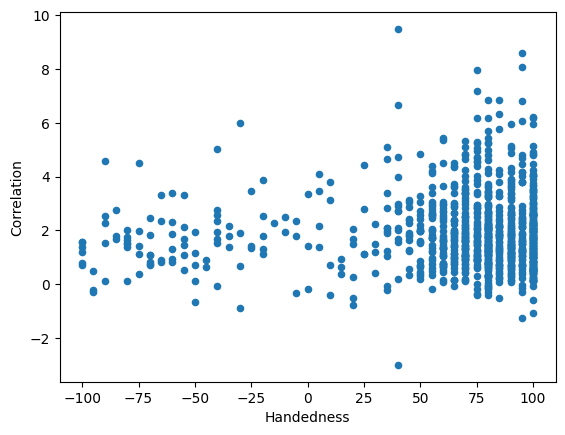

In [215]:
corr_hand.plot.scatter(x="Handedness", y="Correlation")

<Axes: xlabel='Handedness', ylabel='Correlation'>

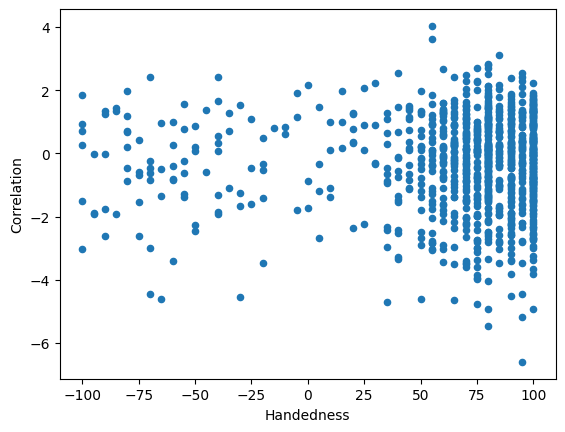

In [218]:
#40 region
corr_hand.plot.scatter(x="Handedness", y="Correlation")